### Dataset description

The dataset is focused on hospital-related information spanning the years 1999-2008, and it is available at https://archive.ics.uci.edu/ml/datasets/Diabetes+130-US+hospitals+for+years+1999-2008. It comprises over 50 features that represent both patient and hospital outcomes. The aim is to predict which patients will need hospital readmission.

In the dataset, there are three distinct classes used for readmission categorization:

1. `<30` indicates patients who were readmitted in less than 30 days.
2. `>30` represents patients who were readmitted in more than 30 days.
3. `No` signifies no record of readmission.

To streamline the classification task, we categorize patients into two groups: those with no record of readmission versus those with a record of readmission, achieved by consolidating the classes labeled as "<30" and ">30".

### Setup and Library Imports

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer


import warnings
warnings.filterwarnings("ignore")

### Loading Dataset and Initial Data Exploration

In [2]:
path = 'diabetic_data.csv'
dataset = pd.read_csv(path)

print(f'The shape of the dataset is: {dataset.shape}\n')
print(f'The type of the columns is:\n{dataset.dtypes.value_counts()}')

The shape of the dataset is: (101766, 50)

The type of the columns is:
object    37
int64     13
Name: count, dtype: int64


The data contains 50 features and 101766 samples, which makes the sample-to-feature ratio 2035:1

Out of 50, the dataset consists of:
- categorical features = 37 continuous features = 13

### Exploration of Categorical Variables and Data Distribution

In [3]:
print(f'List of Distinct Races:\n {dataset.race.unique()}\n')
print(f'List of Distinct Weights:\n {dataset.weight.unique()}\n')

for column in dataset.columns:
     if dataset[column].dtype == object:
            print(column,dataset[column][dataset[column] == '?'].count())
            dataset[column] = dataset[column].replace('?',np.nan).fillna(0)

List of Distinct Races:
 ['Caucasian' 'AfricanAmerican' '?' 'Other' 'Asian' 'Hispanic']

List of Distinct Weight:
 ['?' '[75-100)' '[50-75)' '[0-25)' '[100-125)' '[25-50)' '[125-150)'
 '[175-200)' '[150-175)' '>200']

race 2273
gender 0
age 0
weight 98569
payer_code 40256
medical_specialty 49949
diag_1 21
diag_2 358
diag_3 1423
max_glu_serum 0
A1Cresult 0
metformin 0
repaglinide 0
nateglinide 0
chlorpropamide 0
glimepiride 0
acetohexamide 0
glipizide 0
glyburide 0
tolbutamide 0
pioglitazone 0
rosiglitazone 0
acarbose 0
miglitol 0
troglitazone 0
tolazamide 0
examide 0
citoglipton 0
insulin 0
glyburide-metformin 0
glipizide-metformin 0
glimepiride-pioglitazone 0
metformin-rosiglitazone 0
metformin-pioglitazone 0
change 0
diabetesMed 0
readmitted 0


> We observe that the dataset has '?' value for many features in the dataset. The feature weight has most of the values as '?'.


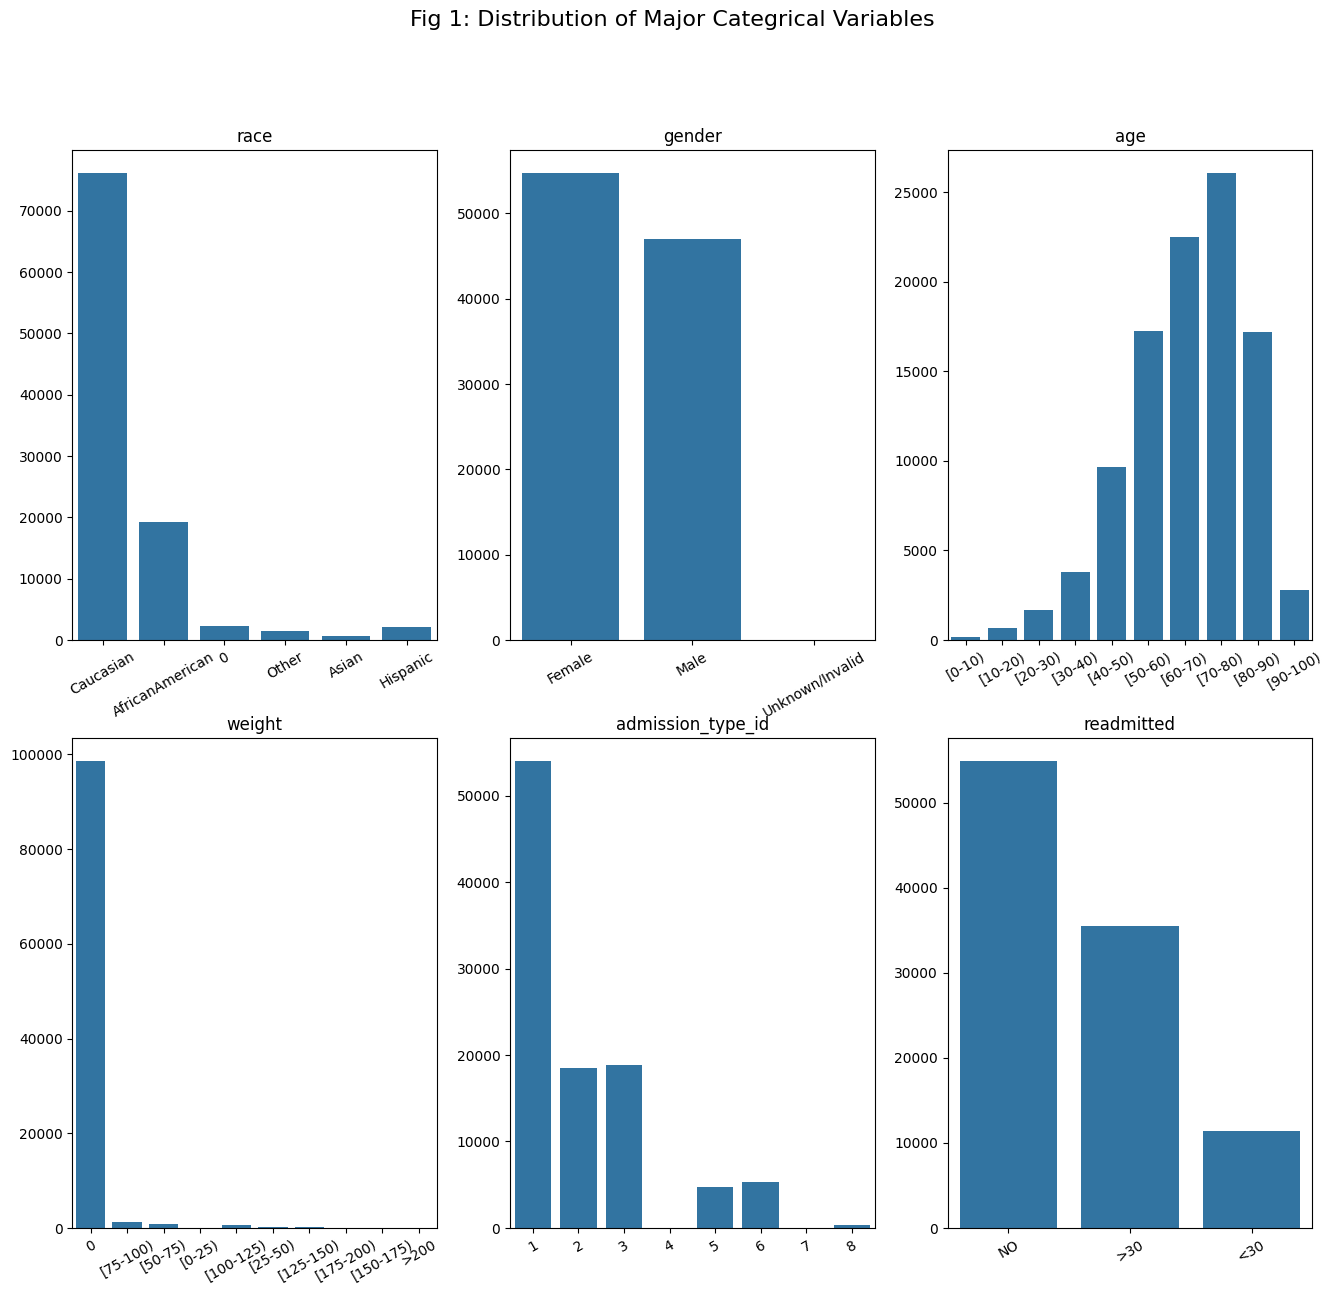

In [4]:
column_name = ['race','gender','age', 'weight','admission_type_id','readmitted']

plt.figure(figsize=[16,14])
for i in range(len(column_name)):
    plt.subplot(2,3,i+1)
    sns.countplot(x = dataset[column_name[i]], data = dataset)    
    plt.xticks(rotation=30)
    plt.xlabel('')
    plt.ylabel('')
    plt.title(column_name[i])
plt.suptitle('Fig 1: Distribution of Major Categrical Variables', size=16)  
plt.show()